# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Importing Dataset

In [2]:
train_data=pd.read_csv(r"train.csv")
test_data=pd.read_csv(r"test.csv")

# Preprocessing Training Data

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(train_data.shape)
print(test_data.shape)

(614, 13)
(367, 12)


In [6]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Encoding Categorical Data

In [29]:
train_data["Gender"]=le.fit_transform(train_data["Gender"])
train_data["Self_Employed"]=le.fit_transform(train_data["Self_Employed"])
train_data["Dependents"]=le.fit_transform(train_data["Dependents"])
train_data["Married"]=le.fit_transform(train_data["Married"])
train_data["Property_Area"]=le.fit_transform(train_data["Property_Area"])
train_data["Education"]=le.fit_transform(train_data["Education"])
train_data["Loan_Status"]=le.fit_transform(train_data["Loan_Status"])

In [30]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


### Filling NULL Values

In [31]:
train_data["Gender"].fillna(train_data["Gender"].mode()[0])
train_data["Married"].fillna(train_data["Married"].mode()[0])
train_data['Dependents'].fillna(train_data["Dependents"].mode()[0])
train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0])
train_data["Credit_History"]=train_data["Credit_History"].fillna(train_data["Credit_History"].mode()[0])

In [10]:
train_data["Loan_Amount_Term"]=train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mode()[0])

In [11]:
train_data["LoanAmount"]=train_data["LoanAmount"].fillna(train_data["LoanAmount"].median())

In [26]:
train_data["Total_Income"]=train_data["ApplicantIncome"]+train_data["CoapplicantIncome"]

In [32]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [27]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [13]:
train_data.shape

(614, 13)

In [33]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

# Preprocessing Test Data

In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [22]:
test_data.shape

(367, 12)

In [14]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Encoding The Categorical Data

In [18]:
test_data["Gender"]=le.fit_transform(test_data["Gender"])
test_data["Self_Employed"]=le.fit_transform(test_data["Self_Employed"])
test_data["Dependents"]=le.fit_transform(test_data["Dependents"])
test_data["Married"]=le.fit_transform(test_data["Married"])
test_data["Property_Area"]=le.fit_transform(test_data["Property_Area"])
test_data["Education"]=le.fit_transform(test_data["Education"])

### Filling The NULL Values

In [19]:
test_data["Gender"].fillna(test_data["Gender"].mode()[0])
test_data["Married"].fillna(test_data["Married"].mode()[0])
test_data['Dependents'].fillna(test_data["Dependents"].mode()[0])
test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0])
test_data["Credit_History"]=test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0])

In [21]:
test_data["Loan_Amount_Term"]=test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mode()[0])

In [20]:
test_data["LoanAmount"]=test_data["LoanAmount"].fillna(test_data["LoanAmount"].median())

In [23]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Visiualizing Training Data

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

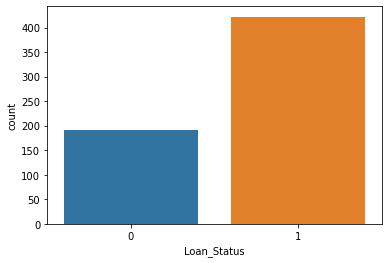

In [39]:
sns.countplot(train_data["Loan_Status"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

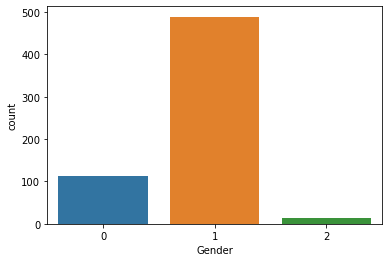

In [40]:
sns.countplot(train_data["Gender"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

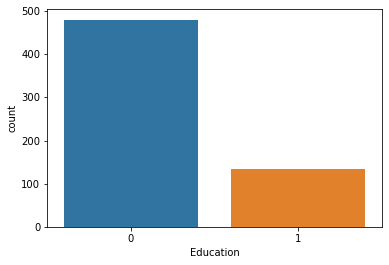

In [41]:
sns.countplot(train_data["Education"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

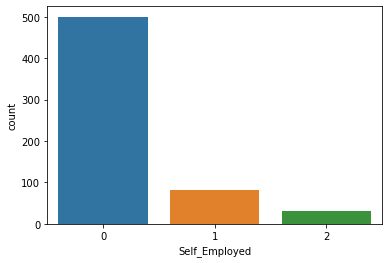

In [42]:
sns.countplot(train_data["Self_Employed"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

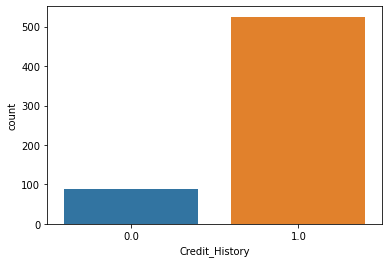

In [43]:
sns.countplot(train_data["Credit_History"])

In [46]:
plt.figure(figsize(20,20))
sns.heatmap(train_data.corr(),annot=True)

NameError: name 'figsize' is not defined